#### 参照設定

In [1]:
#r "nuget:Microsoft.Data.Sqlite,8.0.3"
#r "nuget:Skender.Stock.Indicators,2.5.0"
#r "nuget:ccxt,4.2.85"
#r "nuget:ScottPlot,5.0.30"
#r "nuget:ReactiveProperty,9.5.0"
#r "nuget:SkiaSharp.NativeAssets.Linux.NoDependencies"
#r "/workspace/src/Common/obj/Debug/net8.0/Common.dll"
#r "/workspace/src/Domain/obj/Debug/net8.0/Domain.dll"
#r "/workspace/src/Infra/obj/Debug/net8.0/Infra.dll"

using BotTrade.Infra;
using BotTrade.Infra.Exchanges;
using BotTrade.Domain;
using BotTrade.Domain.Strategies;
using ScottPlot;
using Microsoft.DotNet.Interactive.Formatting;


Installed Packages ccxt, 4.2.85 Microsoft.Data.Sqlite, 8.0.3 ReactiveProperty, 9.5.0 ScottPlot, 5.0.30 Skender.Stock.Indicators, 2.5.0 SkiaSharp.NativeAssets.Linux.NoDependencies, 2.88.8

Loading extensions from `/root/.nuget/packages/skiasharp/2.88.8/interactive-extensions/dotnet/SkiaSharp.DotNet.Interactive.dll`

#### formatの設定
chart画像の大きさ設定もここ

In [2]:
Formatter.Register(typeof(ScottPlot.Plot), (p, w) => 
    w.Write(((ScottPlot.Plot)p).GetImageHtml(1600, 1200)), HtmlFormatter.MimeType);


#### パラメータ設定

In [3]:
var setting = new Setting.Bot()
{
    Capital = 100,
    Exchange = new Setting.Exchange()
    {
        Place = ExchangePlace.Bybit,
        Symbol = Symbol.Spot_BTCUSDT,
    },
    Strategies = 
    [
        new Setting.Strategy() 
        {
            Kind = StrategyKind.MACross,
            Timeframe = Timeframe.OneDay,
            Parameters = [ 5, 10 ],
        },
    ],
};



#### Bot稼働

In [4]:

var factory = new BotFactory();
var bot = factory.Create(setting);
bot.Start();


info: BotTrade.Domain.Bot[0]
      Bot start at [MACross(5, 10)] from 100 in Bybit_BTC/USDT_1d
info: BotTrade.Domain.Bot[0]
      Bot stoped. Profit/loss 71.69090


#### chartの描画
{
    1: ロウソク足
    2: 取引高
    3~: ユーザ定義
}


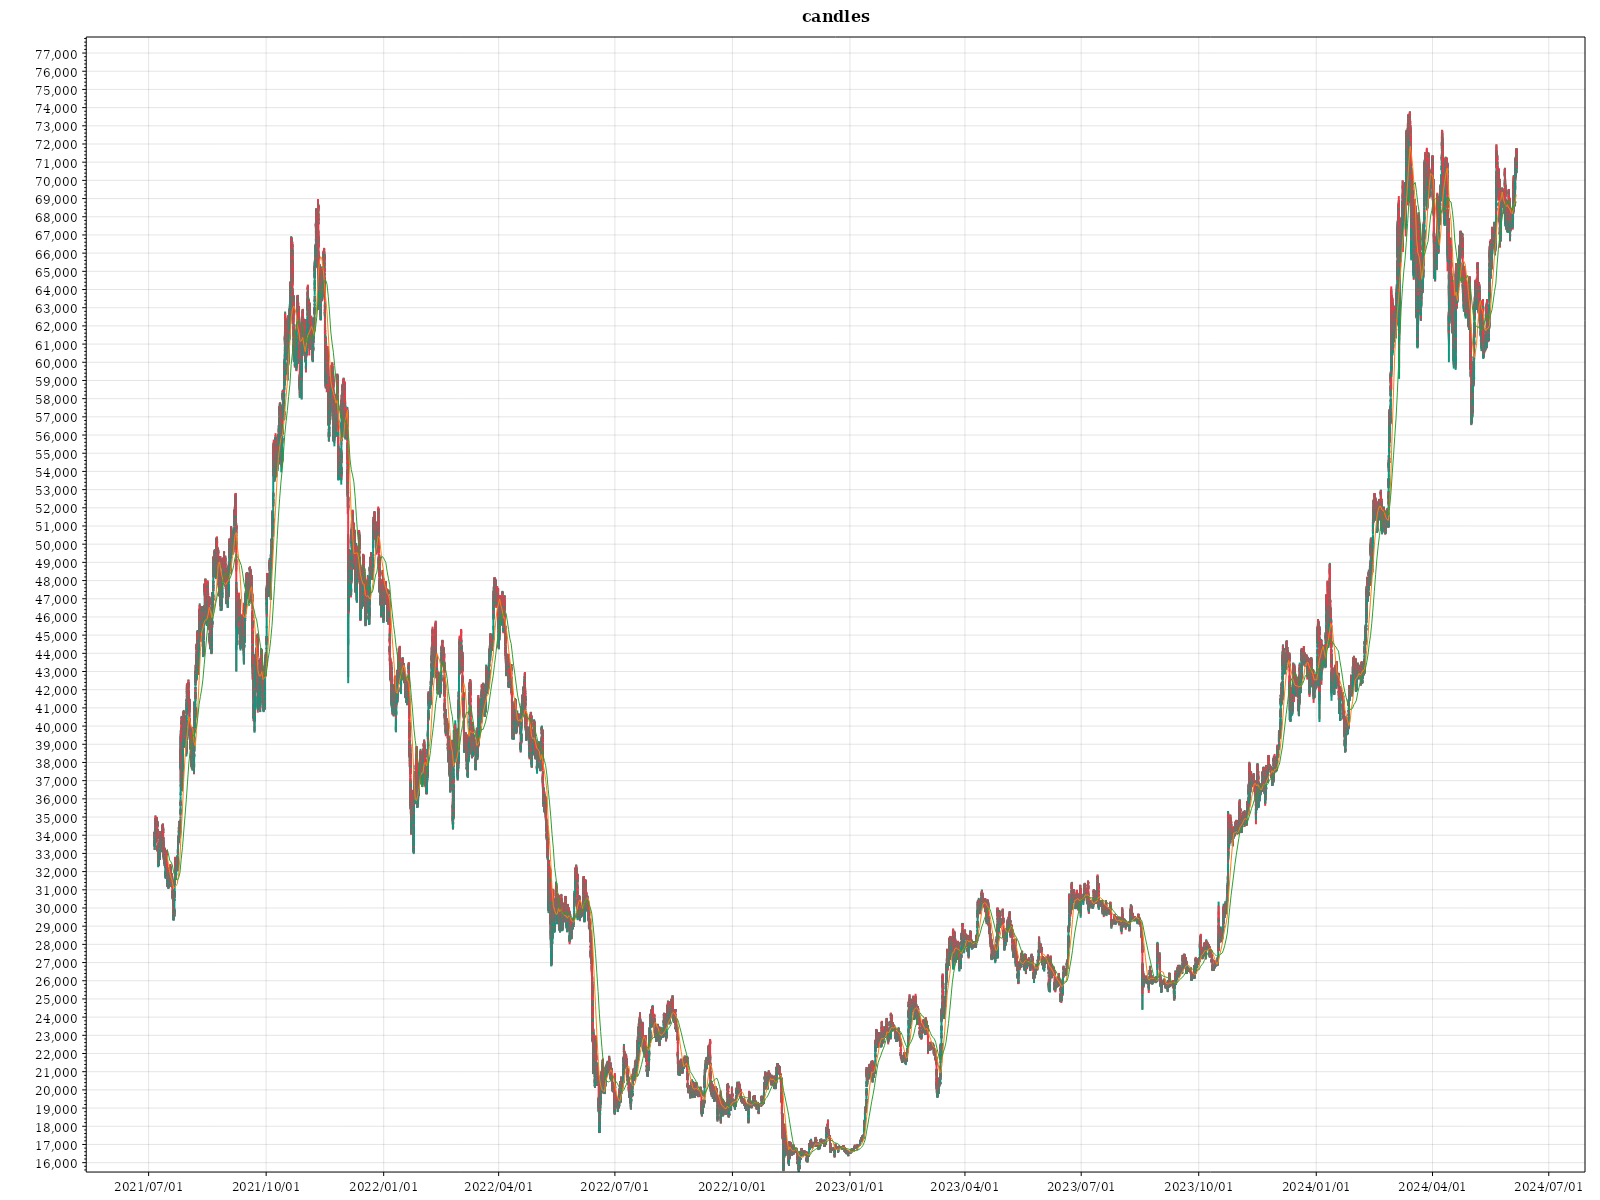


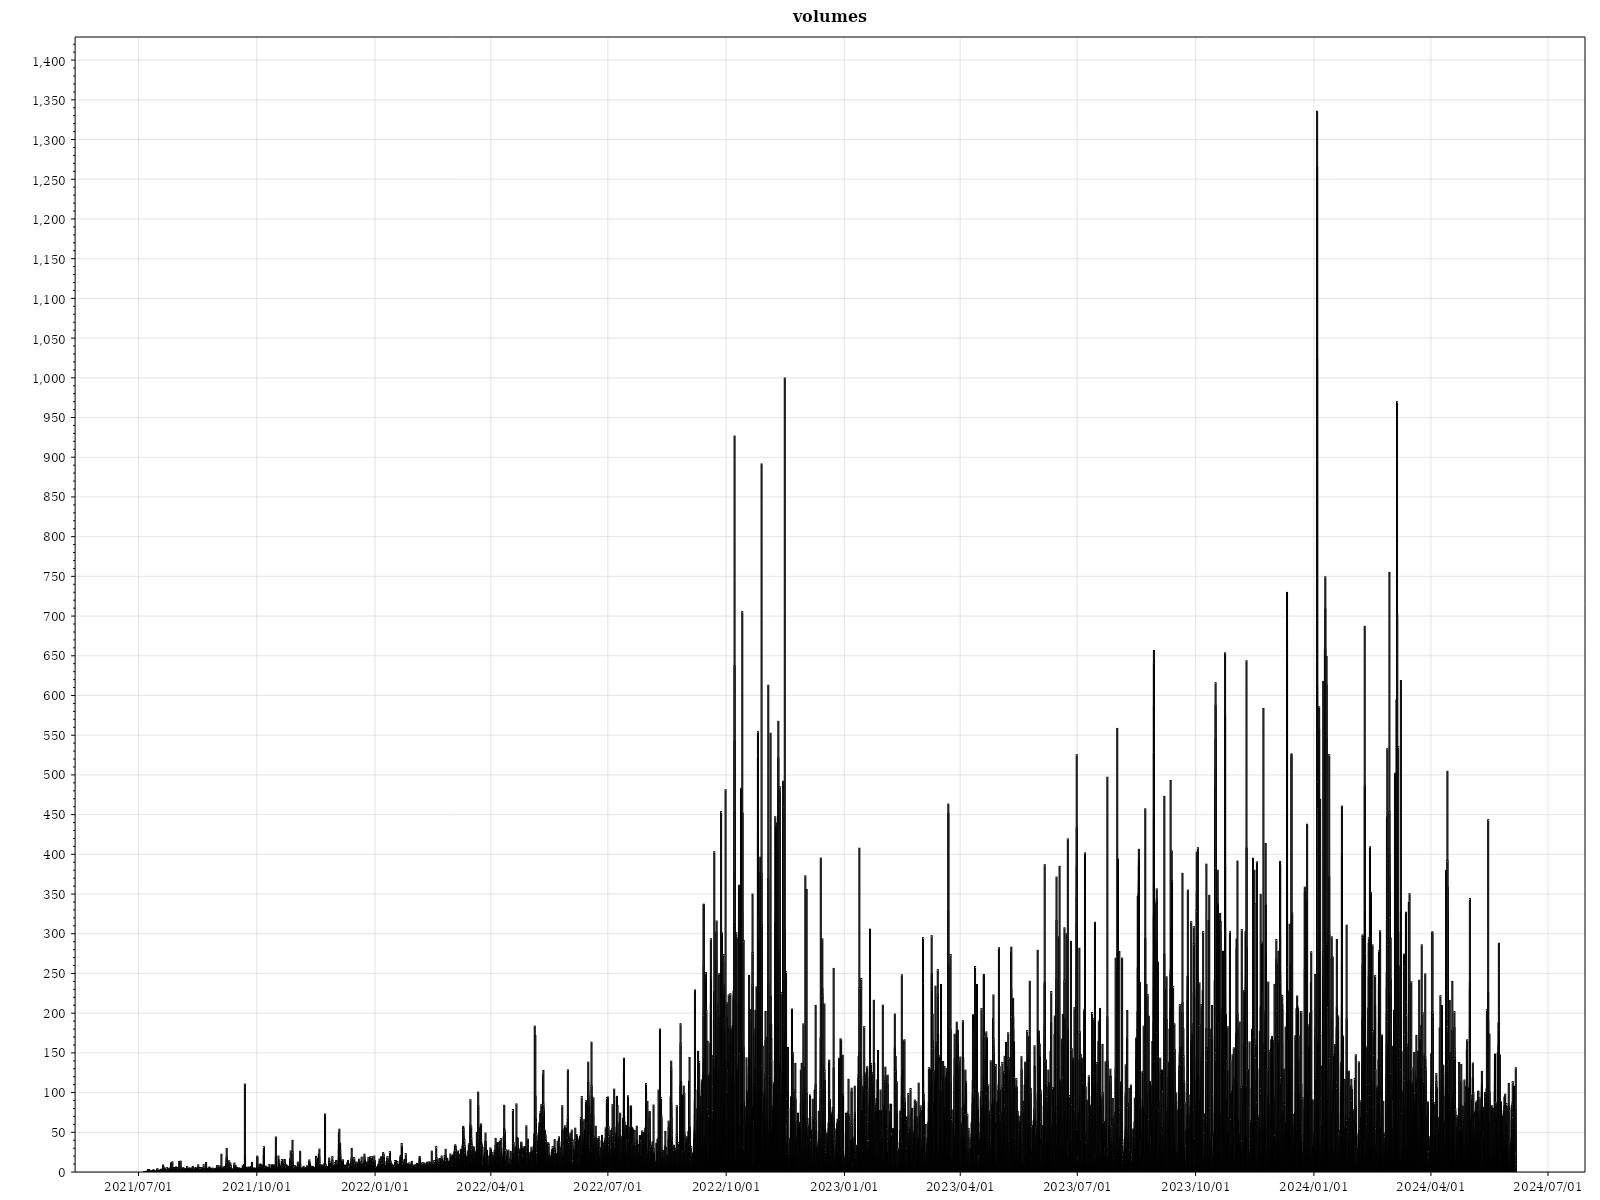

In [5]:
var charts = bot.ChartMaker?.Output();
foreach(var chart in charts)
{
    chart.Display();
}
